In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

In [122]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [123]:
# CSV 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/baseline/test.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3123 non-null   int64  
 1   Date        3123 non-null   object 
 2   Gu          3123 non-null   object 
 3   PM10        3123 non-null   float64
 4   PM2.5       3123 non-null   float64
 5   O3          3123 non-null   float64
 6   NO2         3123 non-null   float64
 7   CO          3123 non-null   float64
 8   SO2         3123 non-null   float64
 9   DailyRain   3123 non-null   float64
 10  VisitNum    3123 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 268.5+ KB


,Unnamed: 0,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2,DailyRain,VisitNum
0,0,2023-01-02,도봉구,21.0,10.0,0.0287,0.0130,0.38,0.0028,0.0,120956.0
1,1,2023-01-03,도봉구,26.0,15.0,0.0194,0.0259,0.54,0.0025,0.0,118727.0
2,2,2023-01-04,도봉구,28.0,20.0,0.0176,0.0333,0.62,0.0026,0.0,114711.0
3,3,2023-01-05,도봉구,45.0,33.0,0.0107,0.0445,0.80,0.0028,0.0,119399.0
4,4,2023-01-06,도봉구,66.0,54.0,0.0109,0.0453,0.88,0.0028,0.0,123182.0
...,...,...,...,...,...,...,...,...,...,...,...
3118,3251,2023-06-26,중랑구,17.0,11.0,0.0277,0.0178,0.31,0.0022,65.0,39284.0
3119,3252,2023-06-27,중랑구,37.0,11.0,0.0465,0.0174,0.32,0.0022,2.0,41083.0
3120,3253,2023-06-28,중랑구,35.0,21.0,0.0473,0.0204,0.37,0.0023,0.0,41516.0
3121,3254,2023-06-29,중랑구,33.0,22.0,0.0328,0.0198,0.31,0.0021,133.5,39480.0


In [124]:
# Date로부터 ‘월’을 의미하는 month 정보를 피처로 추출합니다.
data['month'] = data['Date'].apply(lambda x: x[:7])

# 월별 거래 횟수를 계산하여 출력합니다.
data['month'].value_counts()

2023-01    636
2023-06    595
2023-03    520
2023-04    510
2023-05    468
2023-02    394
Name: month, dtype: int64

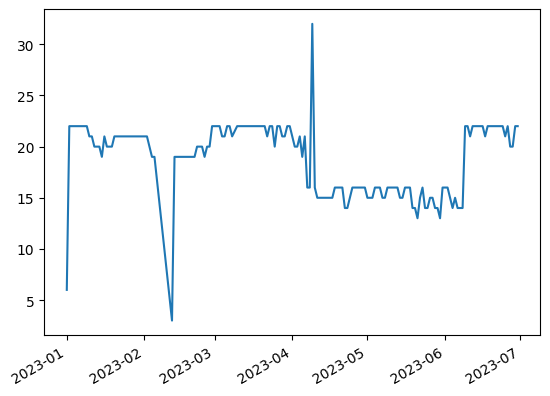

In [125]:
# 일별 거래 횟수를 계산하여 그래프로 출력합니다.(완전히는 이해 못함 ,, 무ㅜ지)
data_day = pd.to_datetime(data['Date'].apply(lambda x: x[:10])).value_counts()
data_day.plot()
plt.show()

<Axes: >

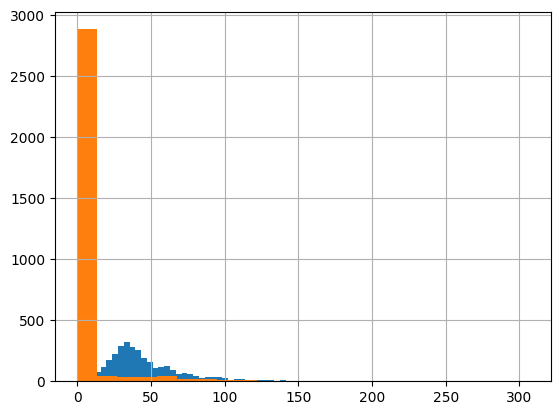

In [126]:
# 가격의 분포를 그래프로 탐색합니다.
data['PM10'].hist(bins="auto") #파랑이
data['DailyRain'].hist(bins="auto") #주황이
# data['VisitNum'].hist(bins="auto")

<Axes: xlabel='PM10', ylabel='DailyRain'>

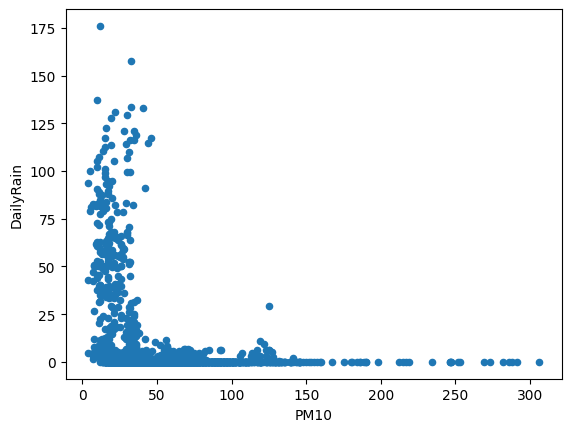

In [127]:
# factory_price와 price 피처를 scatter plot으로 출력하여, 상관관계를 살펴봅니다.
data.plot.scatter(x='PM10', y='DailyRain')

In [128]:
#여러 열을 지정하여 각 행마다 그 열들의 평균을 구하려면?
#data_mean = data[['PM10',	'PM2.5',	'O3',	'NO2',	'CO',	'SO2']].mean(axis=1)
data['total_pollution'] = data[['PM10',	'PM2.5',	'O3',	'NO2',	'CO',	'SO2']].mean(axis=1) #표에 추가

In [129]:
data

,Unnamed: 0,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2,DailyRain,VisitNum,month,total_pollution
0,0,2023-01-02,도봉구,21.0,10.0,0.0287,0.0130,0.38,0.0028,0.0,120956.0,2023-01,5.237417
1,1,2023-01-03,도봉구,26.0,15.0,0.0194,0.0259,0.54,0.0025,0.0,118727.0,2023-01,6.931300
2,2,2023-01-04,도봉구,28.0,20.0,0.0176,0.0333,0.62,0.0026,0.0,114711.0,2023-01,8.112250
3,3,2023-01-05,도봉구,45.0,33.0,0.0107,0.0445,0.80,0.0028,0.0,119399.0,2023-01,13.143000
4,4,2023-01-06,도봉구,66.0,54.0,0.0109,0.0453,0.88,0.0028,0.0,123182.0,2023-01,20.156500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,3251,2023-06-26,중랑구,17.0,11.0,0.0277,0.0178,0.31,0.0022,65.0,39284.0,2023-06,4.726283
3119,3252,2023-06-27,중랑구,37.0,11.0,0.0465,0.0174,0.32,0.0022,2.0,41083.0,2023-06,8.064350
3120,3253,2023-06-28,중랑구,35.0,21.0,0.0473,0.0204,0.37,0.0023,0.0,41516.0,2023-06,9.406667
3121,3254,2023-06-29,중랑구,33.0,22.0,0.0328,0.0198,0.31,0.0021,133.5,39480.0,2023-06,9.227450


In [130]:
from sklearn.model_selection import train_test_split

def load_and_split_data(data, test_size=0.2, random_state=42):

    # 특성 변수 (X)와 타깃 변수 (y)를 분리
    X = data[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain']]
    y = data['VisitNum']

    # 데이터셋을 train, val, test로 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 데이터를 학습/테스트용 데이터로 분리합니다.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #깃허브에서는 사이즈를 0.3으로 둠 validation을 안 한듯
X_train, X_val, X_test, y_train, y_val, y_test = load_and_split_data(data)
## X = df.loc[:, df.columns != 'price']

# 랜덤 포레스트 모델을 학습합니다.
forest = RandomForestRegressor(n_estimators=200,
                               criterion='squared_error') #깃허브에서는 criterion='mse'로 둠 -> 이러니까 오류떠서 수정함
                               #n_estimators=1000 -> 200으로 수정함
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 228698867.672, test: 1682137225.323
R^2 train: 0.885, test: 0.151


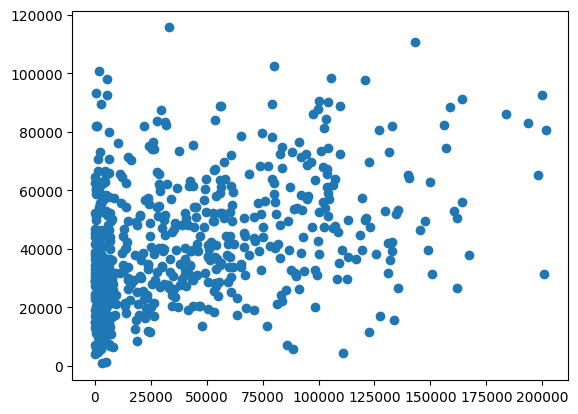

In [132]:
plt.scatter(y_test.values, y_test_pred)

MSE train: 225357575.191, test: 1677133549.673
R^2 train: 0.886, test: 0.154

피처 중요도


[('Gu', 0.2258724063456308),
 ('PM10', 0.16105635826846967),
 ('Unnamed: 0', 0.15565469142999502),
 ('PM2.5', 0.14389227199558627),
 ('Date', 0.13207015500612299),
 ('O3', 0.12660457627815266),
 ('NO2', 0.05484954067604262)]

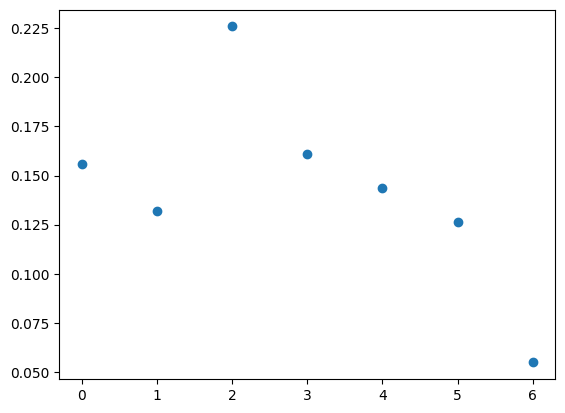

In [133]:
# 랜덤 포레스트 모델을 학습하고 평가합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 피처 중요도 plot을 출력합니다.
importances = forest.feature_importances_
plt.plot(importances, "o")

# 피처 중요도를 print로 출력합니다.
print("\n피처 중요도")
feat_labels = data.columns.tolist() # 깃허브에서는 X.columns로 사용함, 'feat_labels' 변수는 'X' DataFrame의 열 이름을 리스트로 저장
# 'X'는 데이터의 입력 피처를 포함하는 DataFrame
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

# MSE: 작을수록 굳
# R^2 (0 ~ 1): 1에 가까울수록 굳

In [134]:
#[최적의 모델 파라미터 찾기]

from sklearn.model_selection import RandomizedSearchCV

# Randomized Search로 찾아낼 파라미터 후보군을 각각 리스트로 선정합니다.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

# RandomizedSearchCV 오브젝트를 생성하여 모델을 정의합니다.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
forest = RandomForestRegressor()
optimal_forest = RandomizedSearchCV(estimator = forest,
                                    param_distributions = random_grid,
                                    n_iter = 100,
                                    cv = 3,
                                    verbose=2,
                                    random_state=42,
                                    n_jobs = -1)

# RandomizedSearchCV 모델을 학습합니다.
#X = data.loc[:, data.columns != 'price']
#y = data['price']

X = data[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain']]
y = data['VisitNum']
optimal_forest.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [135]:
# 앞서 선정한 파라미터 후보군 중에서 가장 좋은 결과를 보인 파라미터의 조합을 출력합니다.
optimal_forest.best_params_

{'n_estimators': 1800,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [136]:
"처음으로 돌아가서 최적의 파라미터로 수정하고 다시 돌려봐야함니당"

'처음으로 돌아가서 최적의 파라미터로 수정하고 다시 돌려봐야함니당'

In [137]:

"오늘 용산구의 예상 유동인구는 n명입니다"

'오늘 용산구의 예상 유동인구는 n명입니다'